# Assignment 0

**Name:** Wendy Stefany Escamilla Valadez

**e-mail:** wendy.escamilla@cucei.udg.mx

# MODULES

In [302]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored

# Theory on the Gradient Descent algorithm

In [303]:
# Function to be optimized
def f(x, y):
    return x**2 + y**2

# Gradient (derivative of the function)
def grad_f(x, y):
    return np.array([2*x, 2*y])

In [304]:
# Gradient descent algorithm

def gradient_descent(grad, start, learn_rate, n_iter, tolerance=1e-6):
    x = start
    path = [x]
    for _ in range(n_iter):

        # Calculate the new point
        gradient = grad(*x) 
        x_new = x - learn_rate * gradient
        path.append(x_new)

        # Maximum tolerable distance between each point to reach convergence (Maximo tolerable entre cada punto para llegar a converger) (minimo de distancia entre puntos para parar de iterar)
        if np.linalg.norm(x_new - x) < tolerance:
            break
        
        x = x_new
    return x, path


In [305]:

# Run gradient descent algorithm

# Initial values
start = np.array([5.0, 5.0]) # Starting point
learn_rate = .1 # max 1 (alfa)
n_iter = 100

min_point, path = gradient_descent(grad_f, start, learn_rate, n_iter)
path = np.array(path)

print(f"Minimum point: {colored(min_point, 'green')}")



Minimum point: [3.13855087e-06 3.13855087e-06]


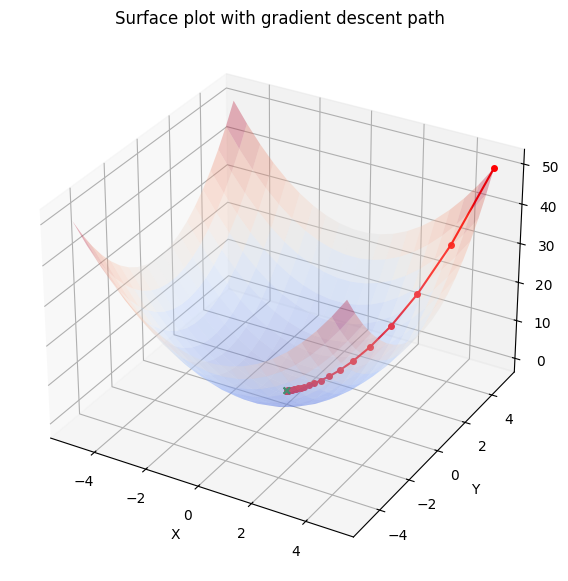

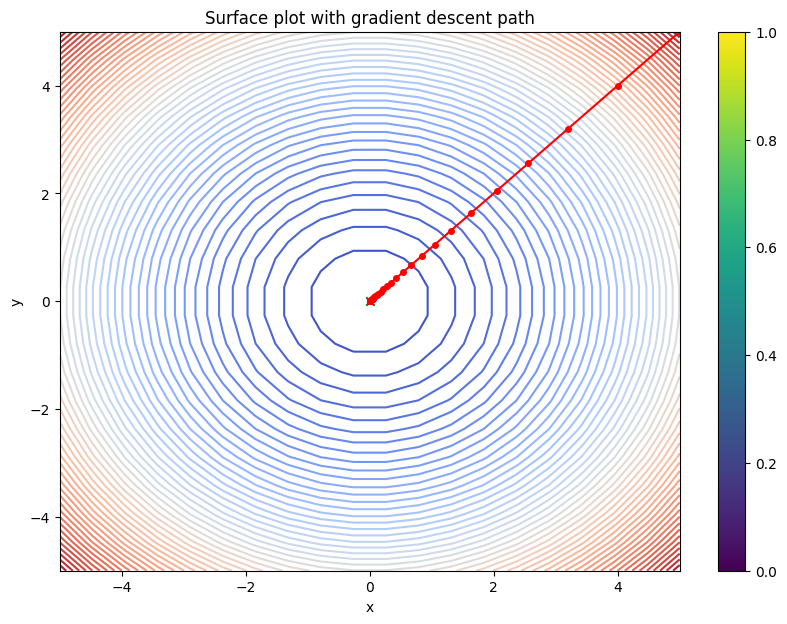

In [306]:
# Plot the results

# Function inicial
x_vals = np.linspace(-5, 5, 20)
y_vals = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y) 

# 3d
# Draw mesh
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.3) 


# Draw slope
ax.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), color='r', marker='o', markersize=4) 


# Draw minium point
ax.scatter(min_point[0], min_point[1], path[-1], color='g', marker='x')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Surface plot with gradient descent path')
plt.show()


# 2d
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='coolwarm')

# Draw slope
plt.plot(path[:, 0], path[:, 1], 'ro-', markersize=4)

# Draw minium point
plt.scatter(min_point[0], min_point[1], color='g', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Surface plot with gradient descent path')
plt.colorbar()
plt.show()